In [2]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.conf import SparkConf
spark = SparkSession.builder.getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
sc.install_pypi_package("pandas==0.25.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
sc.install_pypi_package("matplotlib==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

In [79]:
from pyspark.sql.functions import  avg, col, max
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Load data for a few days

In [170]:
def parse_day(d): 
    return str(d) if d > 9 else f"0{d}"

def load_days_range(m, d1, d2, y=2021):
    smog_df = spark.read.json(f"s3a://openaq-fetches/realtime/{y}-{parse_day(m)}-{parse_day(d1)}/*")
    for i in range(d1 + 1, d2 + 1):
        smog_df_part = spark.read.json(f"s3a://openaq-fetches/realtime/{y}-{parse_day(m)}-{parse_day(i)}/*")
        smog_df = smog_df.union(smog_df_part)
    return smog_df

def load_month(m, days=31, y=2021):    
    return load_days_range(m,1,days)

def load_year(y):    
    smog_df = load_month(1,days=31, y=y)
    mdays = [31,28,31,30,31,30,31,31,30,31,30,31]
    for i in range(1,12):
        smog_df = smog_df.union(load_month(i+1,days=mdays[i], y=y))
    return smog_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
smog_df = load_days_range(11,1,6)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Path does not exist: s3a://openaq-fetches/realtime/2021-10/*;
Traceback (most recent call last):
  File "<stdin>", line 12, in load_month
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/sql/readwriter.py", line 300, in json
    return self._df(self._jreader.json(self._spark._sc._jvm.PythonUtils.toSeq(path)))
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1305, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/sql/utils.py", line 137, in deco
    raise_from(converted)
  File "<string>", line 3, in raise_from
pyspark.sql.utils.AnalysisException: Path does not exist: s3a://openaq-fetches/realtime/2021-10/*;



In [35]:
smog_df_one_day = load_days_range(11,1,1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [144]:
smog_df_month = load_month(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
smog_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- attribution: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- averagingPeriod: struct (nullable = true)
 |    |-- unit: string (nullable = true)
 |    |-- value: double (nullable = true)
 |-- city: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |-- country: string (nullable = true)
 |-- date: struct (nullable = true)
 |    |-- local: string (nullable = true)
 |    |-- utc: string (nullable = true)
 |-- location: string (nullable = true)
 |-- mobile: boolean (nullable = true)
 |-- parameter: string (nullable = true)
 |-- sourceName: string (nullable = true)
 |-- sourceType: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- value: double (nullable = true)

In [50]:
smog_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+-----+--------------------+-------+--------------------+--------------------+------+---------+--------------+----------+-----+------+
|         attribution|averagingPeriod| city|         coordinates|country|                date|            location|mobile|parameter|    sourceName|sourceType| unit| value|
+--------------------+---------------+-----+--------------------+-------+--------------------+--------------------+------+---------+--------------+----------+-----+------+
|[[EPA AirNow DOS,...|   [hours, 1.0]|Kabul|[34.535812, 69.19...|     AF|[2021-08-15T20:00...|US Diplomatic Pos...| false|     pm25|StateAir_Kabul|government|µg/m³|-999.0|
|[[EPA AirNow DOS,...|   [hours, 1.0]|Kabul|[34.535812, 69.19...|     AF|[2021-08-15T21:00...|US Diplomatic Pos...| false|     pm25|StateAir_Kabul|government|µg/m³|-999.0|
|[[EPA AirNow DOS,...|   [hours, 1.0]|Kabul|[34.535812, 69.19...|     AF|[2021-08-15T22:00...|US Diplomatic Pos...| false|     pm25|StateAir

### Task 1
Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm10” było niższe niż maksymalne stężenie w Berlinie (w całym badanym okresie). Obliczenia wykonaj dla danych z kilku dni. Wyniki posortuj malejąco po stężeniu pm10.

In [47]:
def task1_avg_pm10_smaller_than_in_berlin(df):
    berlin_max = df[(df.parameter == "pm10") & (df.city == "Berlin")].agg({"value": "max"}).collect()[0][0]
    print(berlin_max)
    polish_avg = df[(df.country == "PL") & (df.parameter == "pm10")]\
        .groupby("city")\
        .agg(avg("value").alias("avg_pm10"))\
        .filter(col("avg_pm10") > berlin_max)\
        .orderBy(col("avg_pm10"))
    return polish_avg.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
task1_avg_pm10_smaller_than_in_berlin(smog_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

35.02
                city   avg_pm10
0  Nakło nad Notecią  35.754696
1    Sucha Beskidzka  37.016603
2     Janów Lubelski  37.138293
3          Grudziądz  37.766284

### Task 2
Dla danych z wybranych kilku dni przedstaw w ujęciu godzinowym (wybierz czas UTC) najwyższe zanotowane stężenie pm25 w poszczególnych miastach z całego zbioru danych. Wyniki posortuj po rosnąco datach.

In [112]:
def task2_max_pm25_by_date_city(df):
    data = df[df.parameter == "pm25"]\
        .filter((col("date.UTC") >= "2021-11-01T00:00:00.000Z") & (col("date.UTC") <= "2021-11-06T24:00:00.000Z"))\
        .groupby("date.UTC", "city")\
        .agg(max("value"))\
        .orderBy("UTC")
    return data.toPandas()

def task2_max_pm25_by_date(df):
    data = df[df.parameter == "pm25"]\
        .filter((col("date.UTC") >= "2021-11-01T00:00:00.000Z") & (col("date.UTC") <= "2021-11-06T24:00:00.000Z"))\
        .groupby("date.UTC")\
        .agg(max("value"))\
        .orderBy("UTC")
    return data.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [115]:
result_city = task2_max_pm25_by_date_city(smog_df)
result_city

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                             UTC              city  max(value)
0       2021-11-01T00:00:00.000Z            Newham   12.000000
1       2021-11-01T00:00:00.000Z           Baghdad   63.000000
2       2021-11-01T00:00:00.000Z        Burgenland   39.154999
3       2021-11-01T00:00:00.000Z             Rhône    4.100000
4       2021-11-01T00:00:00.000Z  Basel-Landschaft    5.214900
...                          ...               ...         ...
192488  2021-11-06T23:30:00.000Z          Shillong    7.180000
192489  2021-11-06T23:45:00.000Z           Talcher   49.450000
192490  2021-11-06T23:45:00.000Z             Noida  304.760000
192491  2021-11-06T23:45:00.000Z             Delhi  337.980000
192492  2021-11-06T23:45:00.000Z           Raichur   40.000000

[192493 rows x 3 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

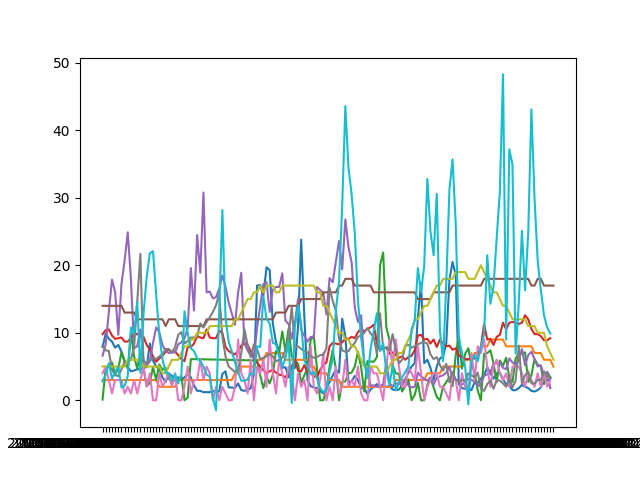

In [125]:
cities = result_city['city'].unique()[20:30]
plt.clf() 
for city in cities:
    df = result_city[result_city.city == city].sort_values(by=['UTC'])
    print(df)
    plt.plot(df["UTC"], df["max(value)"])
plt.show()
%matplot plt

In [116]:
result = task2_max_pm25_by_date(smog_df)
result

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                           UTC  max(value)
0     2021-11-01T00:00:00.000Z     1000.00
1     2021-11-01T00:00:05.000Z        0.00
2     2021-11-01T00:00:06.000Z        4.00
3     2021-11-01T00:00:07.000Z       21.00
4     2021-11-01T00:00:08.000Z        0.00
...                        ...         ...
8626  2021-11-06T22:45:00.000Z     1074.30
8627  2021-11-06T23:00:00.000Z      703.00
8628  2021-11-06T23:15:00.000Z     1074.30
8629  2021-11-06T23:30:00.000Z      718.00
8630  2021-11-06T23:45:00.000Z      337.98

[8631 rows x 2 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

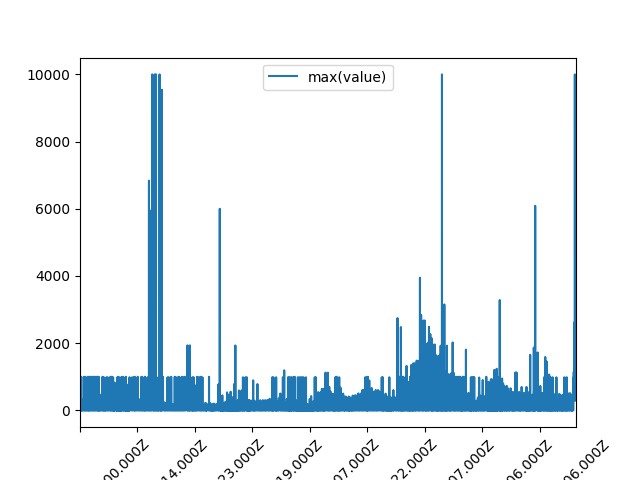

In [134]:
plt.clf()
result.plot(x="UTC", y="max(value)")
plt.xticks(rotation=45)
%matplot plt

### Task 3
Znajdź ranking miast pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. Rozważ jedynie miasta, których nazwy składają się z małych i dużych liter alfabetu łacińskiego.
Podpowiedź: Wykorzystaj window functions oraz `rlike`

In [141]:
from pyspark.sql.window import Window
window = Window.partitionBy(col('city')).orderBy(col('value').desc())

def task3_avg_greatest(df, n=30):
    return df.select('country','city', 'parameter', 'value', 'date')\
        .filter(col('city').rlike("([A-Za-z])+"))\
        .filter(col('parameter')=='pm25')\
        .filter(col('value')>0.0)\
        .withColumn('rank', rank().over(window))\
        .filter(col('rank') <= n)\
        .groupBy('city').agg(avg('value'))\
        .sort(col('avg(value)').asc())\
        .toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [142]:
task3_avg_greatest(smog_df_one_day)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

             city   avg(value)
0      Luxembourg     0.359500
1        Jämtland     0.416667
2        Overberg     0.883000
3     Haute-Corse     0.903030
4           Namur     0.921500
...           ...          ...
1258        Dhaka   359.000000
1259    N'Djamena   365.000000
1260   Davanagere   739.379286
1261        Cádiz  1000.000000
1262    Ahmedabad  2589.736000

[1263 rows x 2 columns]

### Task 4
Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju dla wybranych kilku dni względem czasu (mapa + slider czasu albo zbiór klatek i animacja) dla wybranych państw.

### Task 5
Korzystanie z klastra dla dużych danych:
1. Proszę wykonać zadanie 1 dla danych z całego miesiąca. Zmierzyć czas wykonania
2. Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania
3. Narysować wykresy czasu, przyspieszenia i efektywności (time, speedup, efficiency)

In [149]:
import time

def check_time():
    start = time.time()
    task1_avg_pm10_smaller_than_in_berlin(smog_df_month)
    end = time.time()
    return end-start

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [171]:
check_time()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

54.85
221.59289240837097

In [ ]:
#n=2
#54.85
#490.4540560245514
#n=3
# 54.85
# 304.3723542690277
# n=4
# 54.85
# 264.7867474555969
# n=5
# 54.85
# 221.59289240837097

In [167]:
import pandas as pd

# df_times = pd.DataFrame(data=[[1, 4.9], [2, 4.5], [3, 3.5] [4, 2.4], [5, 2.1], [6, 1.5]], columns=["cluster_size", "time"])
df_times = pd.DataFrame({'cluster_size': [1,2,3,4,5,6,7], 'time': [4.9, 490.4540560245514, 304.3723542690277, 264.7867474555969, 221.59289240837097, 1.5, 1.0]})
df_times

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   cluster_size        time
0             1    4.900000
1             2  490.454056
2             3    3.500000
3             4    2.400000
4             5    2.100000
5             6    1.500000
6             7    1.000000

In [163]:
df_times["speedup"] = df_times["time"][0] / df_times["time"]
df_times["efficiency"] = df_times["speedup"]/df_times["cluster_size"]
df_times

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   cluster_size  time   speedup  efficiency
0             1   4.9  1.000000    1.000000
1             2   4.5  1.088889    0.544444
2             3   3.5  1.400000    0.466667
3             4   2.4  2.041667    0.510417
4             5   2.1  2.333333    0.466667
5             6   1.5  3.266667    0.544444
6             7   1.0  4.900000    0.700000

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

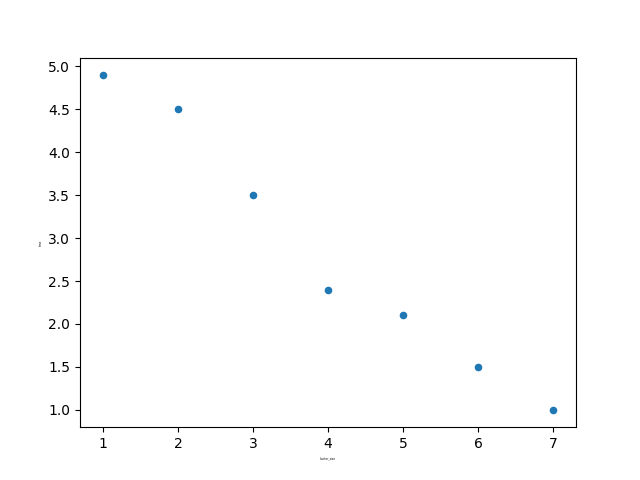

In [164]:
plt.clf()
df_times.plot.scatter(x="cluster_size", y="time")
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

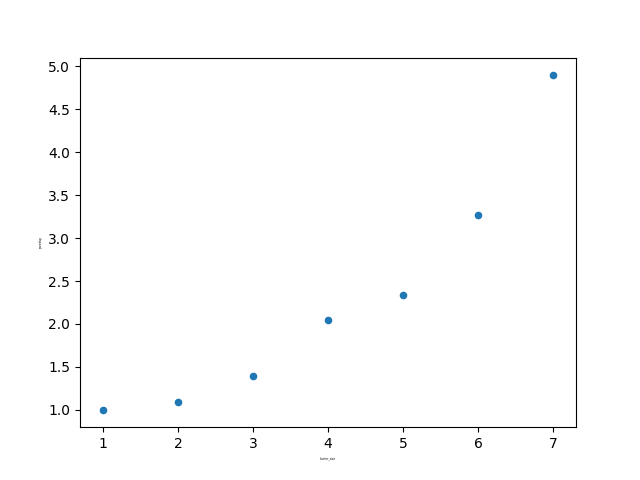

In [165]:
plt.clf()
df_times.plot.scatter(x="cluster_size", y="speedup")
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

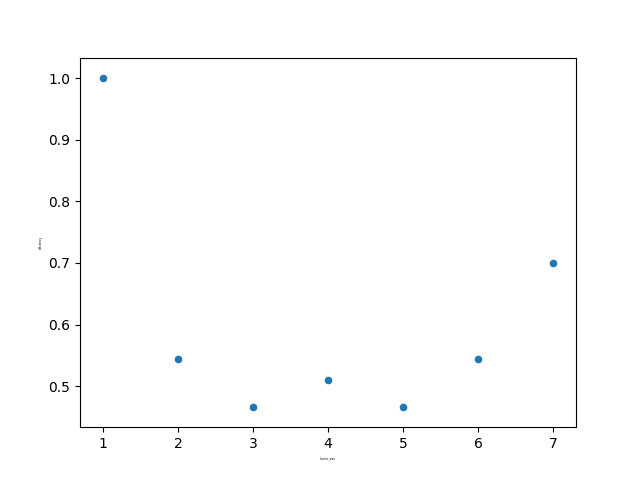

In [166]:
plt.clf()
df_times.plot.scatter(x="cluster_size", y="efficiency")
%matplot plt

### Task 6
Proszę wykonać przykładowe zapytanie dla danych z całego roku 2020. Załączyć wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

In [ ]:
smog_df_year = load_year(2020)